In [1]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

from get_kr import get_kr

In [3]:
# m = 0.05 # [Kg]
# K = 0.0001
# L = 0.01 # [H]
# R = 1 # [Ohm]
# g = 9.81 # [m/s²]

A = np.array([[0, 1, 0],
              [980, 0, -2.8],
              [0, 0, -100]])

B = np.array([[0],
              [0],
              [100]])

C = np.array([1, 0, 0])

D = 0

lev_sys_ss = ctrl.ss(A, B, C, D)
lev_sys_ss

StateSpace(array([[   0. ,    1. ,    0. ],
       [ 980. ,    0. ,   -2.8],
       [   0. ,    0. , -100. ]]), array([[  0.],
       [  0.],
       [100.]]), array([[1., 0., 0.]]), array([[0.]]))

In [4]:
eigvals = np.linalg.eigvals(A)
print("Eigenvalues: ", eigvals)

Eigenvalues:  [  31.30495168  -31.30495168 -100.        ]


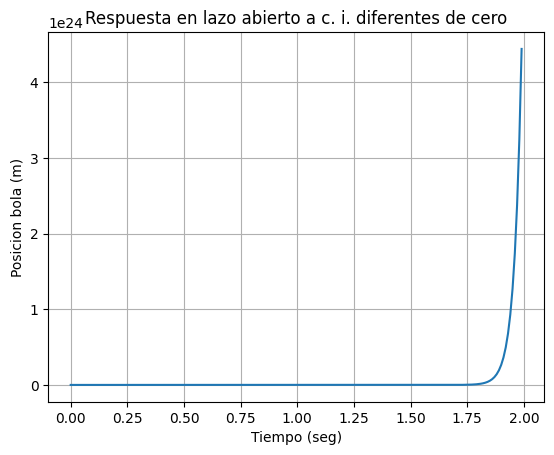

In [16]:
t = np.arange(0, 2, 0.01)
x0 = np.array([0.01, 0, 0])

_, y = ctrl.step_response(lev_sys_ss, T = t, X0 = x0)

plt.figure()
plt.plot(t,y)
plt.title('Respuesta en lazo abierto a c. i. diferentes de cero')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Posicion bola (m)')
plt.grid('both')
plt.show()

In [18]:
# Sistema en lazo cerrado
lev_sys_ss_cl = ctrl.feedback(sys1 = lev_sys_ss, sys2 = 1, sign = -1)
lev_sys_ss_cl

StateSpace(array([[   0. ,    1. ,    0. ],
       [ 980. ,    0. ,   -2.8],
       [-100. ,    0. , -100. ]]), array([[  0.],
       [  0.],
       [100.]]), array([[1., 0., 0.]]), array([[0.]]))

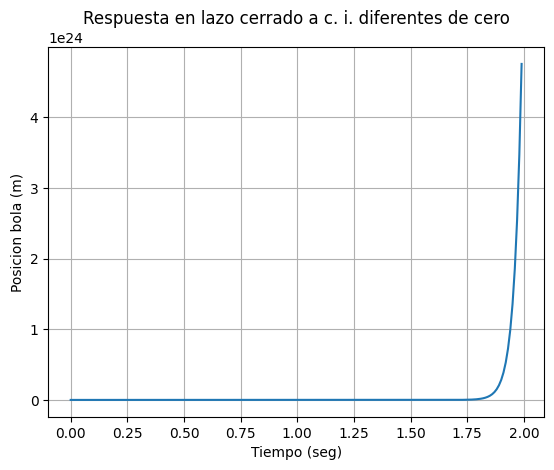

In [19]:
t = np.arange(0, 2, 0.01)
x0 = np.array([0.01, 0, 0])

_, y = ctrl.step_response(lev_sys_ss_cl, T = t, X0 = x0)

plt.figure()
plt.plot(t,y)
plt.title('Respuesta en lazo cerrado a c. i. diferentes de cero')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Posicion bola (m)')
plt.grid('both')
plt.show()

K:  [[-280.71428571   -7.78571429   -0.3       ]]


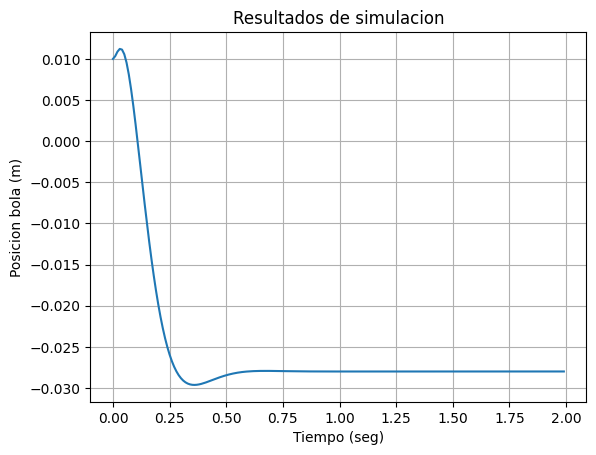

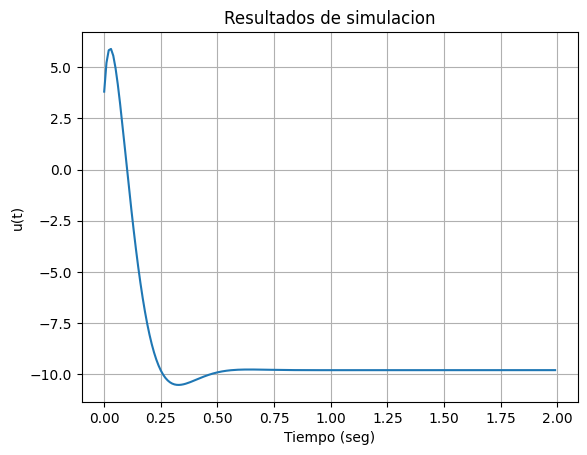

In [41]:
# Control utilizando asignacion de polos
p1 = -10 + 10j
p2 = -10 - 10j
p3 = -50

eig_d = np.array([p1, p2, p3])

K = ctrl.place(A, B, eig_d)
print("K: ", K)

lev_sys_ss_cl_K = ctrl.ss(A - B*K, B, C, D)

t = np.arange(0, 2, 0.01)
x0 = np.array([0.01, 0, 0])

_, y, x = ctrl.step_response(lev_sys_ss_cl_K, T = t, X0 = x0, return_x = True)

plt.figure()
plt.plot(t, y)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Posicion bola (m)')
plt.grid('both')
plt.show()

u_ctrl = (np.ones((1,x.shape[1])) - K@x).flatten()

plt.figure()
plt.plot(t, u_ctrl)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('u(t)')
plt.grid('both')
plt.show()

K:  [[-7.75714286e+02 -2.06428571e+01  4.00000000e-01]]


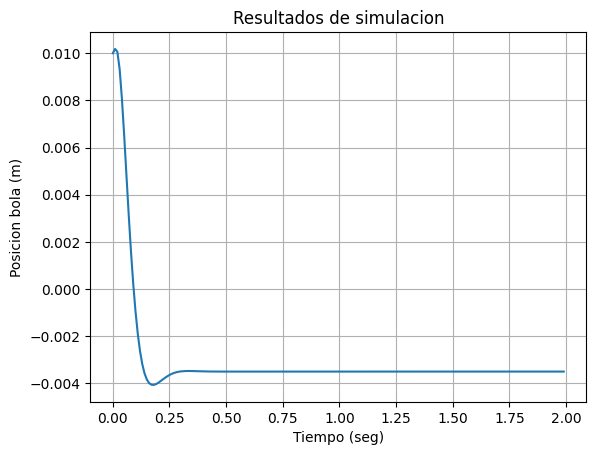

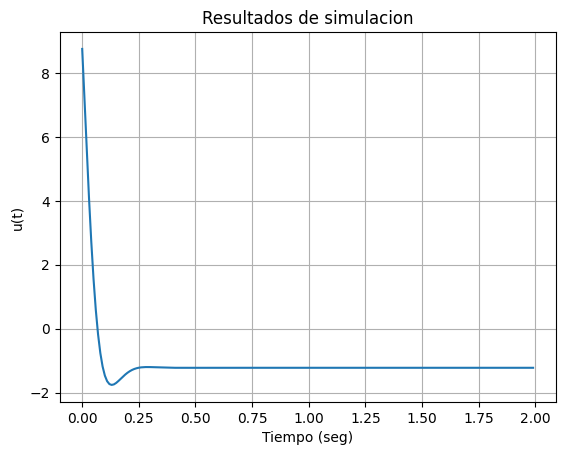

In [42]:
# Control utilizando asignacion de polos
p1 = -20 + 20j
p2 = -20 - 20j
p3 = -100

eig_d = np.array([p1, p2, p3])

K = ctrl.acker(A, B, eig_d)
print("K: ", K)

lev_sys_ss_cl_K = ctrl.ss(A - B*K, B, C, D)

t = np.arange(0, 2, 0.01)
x0 = np.array([0.01, 0, 0])

_, y, x = ctrl.step_response(lev_sys_ss_cl_K, T = t, X0 = x0, return_x = True)

plt.figure()
plt.plot(t, y)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Posicion bola (m)')
plt.grid('both')
plt.show()

u_ctrl = (np.ones((1,x.shape[1])) - K@x).flatten()

plt.figure()
plt.plot(t, u_ctrl)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('u(t)')
plt.grid('both')
plt.show()

In [28]:
kr = get_kr(lev_sys_ss, K)
print("kr: ", kr)

kr:  [[-285.71428571]]


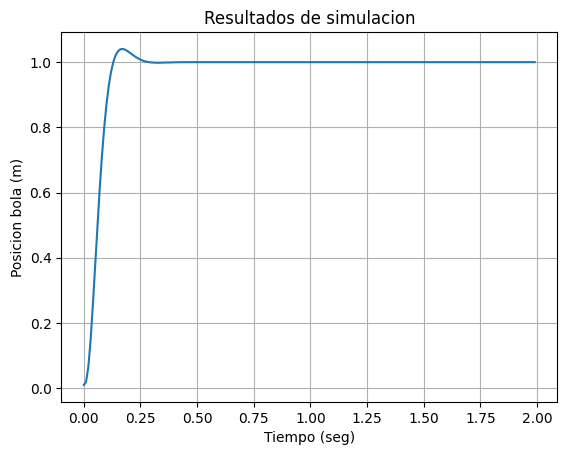

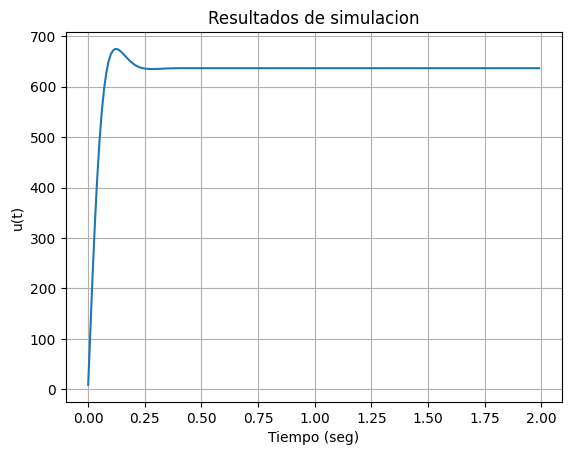

In [43]:
lev_sys_ss_cl_K = ctrl.ss(A - B*K, B*kr, C, D)

t = np.arange(0, 2, 0.01)
x0 = np.array([0.01, 0, 0])

_, y, x = ctrl.step_response(lev_sys_ss_cl_K, T = t, X0 = x0, return_x = True)

plt.figure()
plt.plot(t, y)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Posicion bola (m)')
plt.grid('both')
plt.show()

u_ctrl = (np.ones((1,x.shape[1])) - K@x).flatten()

plt.figure()
plt.plot(t, u_ctrl)
plt.title('Resultados de simulacion')
plt.xlabel('Tiempo (seg)')
plt.ylabel('u(t)')
plt.grid('both')
plt.show()